In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

#### Breakfast Participation Data Exploration

In [ ]:
breakfast = pd.read_excel('datasets/sbsummar.xls', header = None, skiprows=5, skipfooter=4, index_col=0,
                          names= ['year', 'free', 'red_price', 'paid', 'total_breakfast', 'meals_served', 'free_rp_percent_of_total'])
breakfast.head(10)

In [3]:
breakfast.tail()

,free,red_price,paid,total_breakfast,meals_served,free_rp_percent_of_total
year,,,,,,
2011,9.2,0.98,2,12.17,2048.09,83.7
2012,9.77,1.04,2.05,12.87,2145.03,84.2
2013,10.16,1.02,2.02,13.20,2222.98,84.8
2014,10.54,1.01,2.08,13.64,2273.53,84.9
2015,11.09,0.9,2.1,14.09,2334.36,85.2


In [4]:
breakfast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 1969 to 2015
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   free                      47 non-null     object 
 1   red_price                 47 non-null     object 
 2   paid                      47 non-null     object 
 3   total_breakfast           47 non-null     float64
 4   meals_served              47 non-null     float64
 5   free_rp_percent_of_total  47 non-null     float64
dtypes: float64(3), object(3)
memory usage: 2.6+ KB


#### Initial Cleaning

The columns for "free", "red_price" and "paid" will all need to have some values ("--" and "2]") replaced with zeroes and then converted to floats.  I miss it until much later in the investigation, but we should also consider dropping the years 1969 and 1970 from our investigation altogether, as we don't have the relevant data regarding the amount of free/reduced participation (though it's likely we could calculate a total from the `free_rp_percent_of_total` column.

In [5]:
breakfast.replace(to_replace=('--', '2]'), value=0, inplace=True)
breakfast.head(10)

,free,red_price,paid,total_breakfast,meals_served,free_rp_percent_of_total
year,,,,,,
1969,0.00,0.00,0.00,0.22,39.7,71.0
1970,0.00,0.00,0.00,0.45,71.8,71.5
1971,0.60,0.00,0.20,0.80,125.5,76.3
1972,0.81,0.00,0.23,1.04,169.3,78.5
1973,0.99,0.00,0.20,1.19,194.1,83.4
1974,1.14,0.00,0.24,1.37,226.7,82.8
1975,1.45,0.04,0.33,1.82,294.7,82.1
1976,1.76,0.06,0.37,2.20,353.6,84.2
1977,2.02,0.11,0.36,2.49,434.3,85.7


In [6]:
breakfast.red_price = breakfast.red_price.astype(dtype='float64')
breakfast.free = breakfast.free.astype(dtype='float64')
breakfast.paid = breakfast.paid.astype(dtype='float64')
breakfast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 1969 to 2015
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   free                      47 non-null     float64
 1   red_price                 47 non-null     float64
 2   paid                      47 non-null     float64
 3   total_breakfast           47 non-null     float64
 4   meals_served              47 non-null     float64
 5   free_rp_percent_of_total  47 non-null     float64
dtypes: float64(6)
memory usage: 2.6 KB


In [7]:
breakfast.describe()

,free,red_price,paid,total_breakfast,meals_served,free_rp_percent_of_total
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,4.605745,0.434255,0.936596,5.991489,1018.980851,84.325532
std,2.902470,0.369634,0.687118,3.904807,656.555349,4.031586
min,0.000000,0.000000,0.000000,0.220000,39.700000,71.000000
25%,2.795000,0.160000,0.385000,3.340000,574.050000,82.800000
50%,4.050000,0.260000,0.610000,4.920000,852.430000,84.900000
75%,6.370000,0.770000,1.525000,8.665000,1486.405000,86.850000
max,11.090000,1.070000,2.100000,14.090000,2334.360000,90.300000


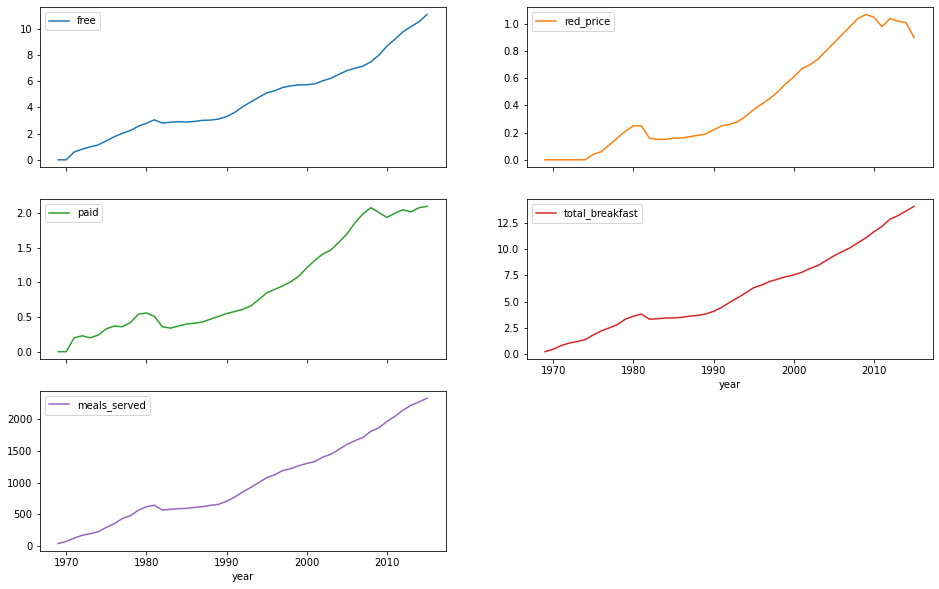

In [8]:
ax = breakfast.drop(labels=(['free_rp_percent_of_total']), axis=1).plot(subplots=True, layout=(3, 2), figsize=(16, 10))

By combining the line charts for the "free," "reduced price" and "paid" values, we can see pretty clearly that the majority of kids getting breakfast at school are doing so under the free or reduced price programs.

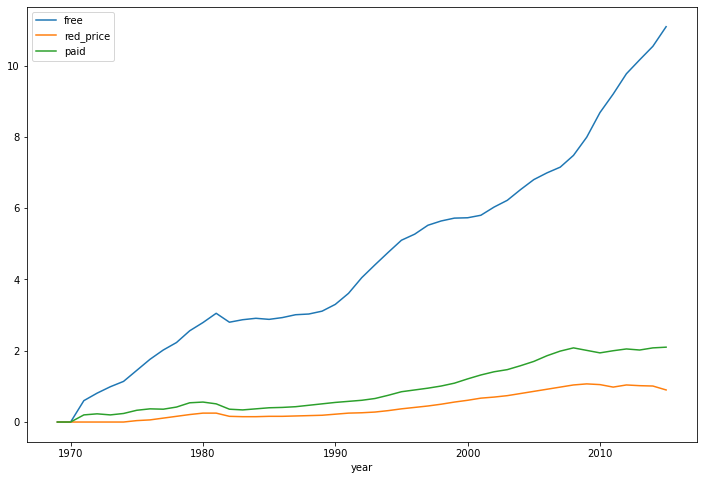

In [36]:
ax = breakfast.iloc[:, [0, 1, 2]].plot(figsize = (12, 8))

####  Checking for Outliers

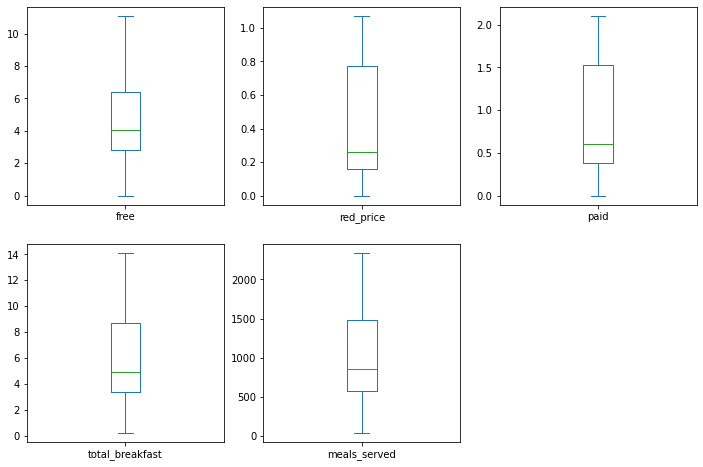

In [9]:
ax = breakfast.drop('free_rp_percent_of_total', axis=1).plot.box(subplots=True, layout =(2, 3), figsize=(12, 8))

No notable outliers are detected, and the data set is relatively clean, so we export the data and move on to the lunch numbers.

In [10]:
breakfast.to_csv('datasets/breakfast_processed.csv')

#### Lunch Participation Data Exploration

In [11]:
lunch = pd.read_excel('datasets/slsummar.xls', header=None, skiprows=6, skipfooter=4, index_col=0,
                      names = [ 'year', 'free', 'red_price', 'paid', 'total_lunch', 'meals_served', 'free_rp_percent_of_total'])
lunch.head(10)

,free,red_price,paid,total_lunch,meals_served,free_rp_percent_of_total
year,,,,,,
1969,2.9,1],16.5,19.4,3368.2,15.1
1970,4.6,1],17.8,22.4,3565.1,20.7
1971,5.8,0.5,17.8,24.1,3848.3,26.1
1972,7.3,0.5,16.6,24.4,3972.1,32.4
1973,8.1,0.5,16.1,24.7,4008.8,35.0
1974,8.6,0.5,15.5,24.6,3981.6,37.1
1975,9.4,0.6,14.9,24.9,4063.0,40.3
1976,10.2,0.8,14.6,25.6,4147.9,43.1
1977,10.5,1.3,14.5,26.2,4250.0,44.8


In [12]:
lunch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 1969 to 2015
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   free                      47 non-null     float64
 1   red_price                 47 non-null     object 
 2   paid                      47 non-null     float64
 3   total_lunch               47 non-null     float64
 4   meals_served              47 non-null     float64
 5   free_rp_percent_of_total  47 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.6+ KB


Only one column here that we need to replace bad values and convert, the `red_price` column.

In [13]:
lunch['red_price'].replace([r"]"], 0, regex=True, inplace=True)
lunch.head()

,free,red_price,paid,total_lunch,meals_served,free_rp_percent_of_total
year,,,,,,
1969,2.9,0.0,16.5,19.4,3368.2,15.1
1970,4.6,0.0,17.8,22.4,3565.1,20.7
1971,5.8,0.5,17.8,24.1,3848.3,26.1
1972,7.3,0.5,16.6,24.4,3972.1,32.4
1973,8.1,0.5,16.1,24.7,4008.8,35.0


In [14]:
lunch.red_price = lunch.red_price.astype(dtype='float64')

In [15]:
lunch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 1969 to 2015
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   free                      47 non-null     float64
 1   red_price                 47 non-null     float64
 2   paid                      47 non-null     float64
 3   total_lunch               47 non-null     float64
 4   meals_served              47 non-null     float64
 5   free_rp_percent_of_total  47 non-null     float64
dtypes: float64(6)
memory usage: 2.6 KB


In [16]:
lunch.describe()

,free,red_price,paid,total_lunch,meals_served,free_rp_percent_of_total
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,11.976596,1.865957,12.665957,26.504255,4380.995957,51.574468
std,3.720929,0.842428,2.132897,2.971382,505.977818,12.271378
min,2.900000,0.000000,8.500000,19.400000,3368.200000,15.100000
25%,9.950000,1.550000,11.400000,24.200000,4006.870000,46.150000
50%,11.200000,1.800000,12.100000,25.900000,4253.310000,53.100000
75%,13.900000,2.600000,13.900000,28.700000,4802.645000,58.800000
max,19.800000,3.200000,17.800000,31.800000,5278.400000,72.600000


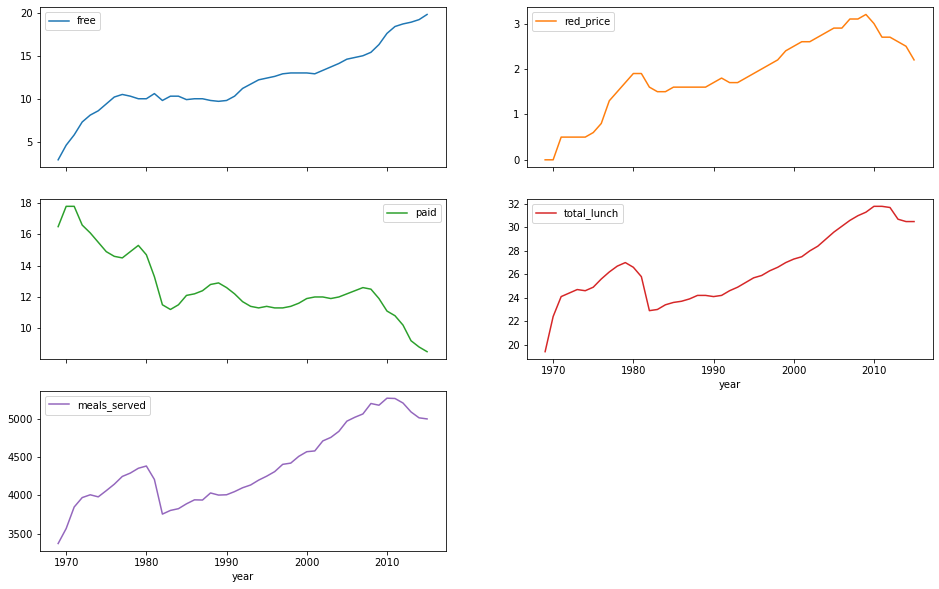

In [17]:
ax = lunch.drop(['free_rp_percent_of_total'], axis=1).plot(subplots=True, layout=(3, 2), figsize=(16, 10))

By following the same pattern we did above, we plot the free, reduced price and paid lunches together, and the data is significantly different. It appears that at a point in the early 1990s, the number of free lunch recipients began to outpace those paying for lunch, but prior to that, it was more common to pay for lunch.

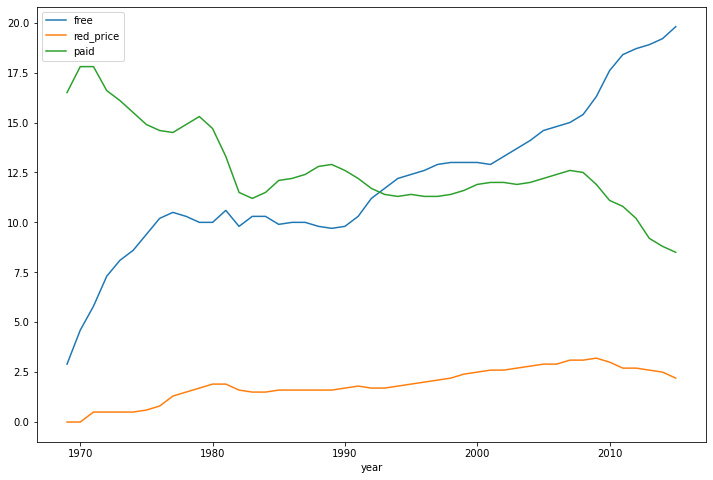

In [35]:
ax = lunch.iloc[:, [0, 1, 2]].plot(figsize = (12, 8))

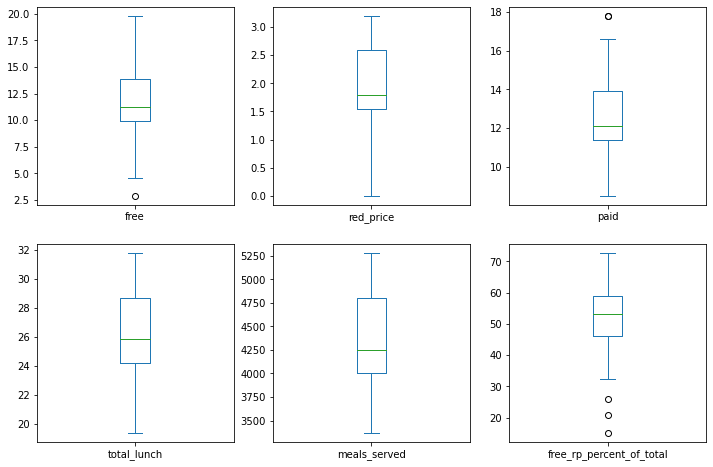

In [18]:
ax = lunch.plot.box(subplots=True, layout =(2, 3), figsize=(12, 8))

A handful of outliers worth investigating here, though once again, they will likely remain in the dataset.

In [19]:
from scipy.stats import zscore

In [20]:
def get_z_score(column_name, df):
    df['z_score'] = zscore(df[column_name])
    outliers = df.query('z_score > 2 | z_score < -2')
    return outliers

In [21]:
outliers = get_z_score('free', lunch)
outliers

,free,red_price,paid,total_lunch,meals_served,free_rp_percent_of_total,z_score
year,,,,,,,
1969,2.9,0.0,16.5,19.4,3368.20,15.1,-2.465708
1970,4.6,0.0,17.8,22.4,3565.10,20.7,-2.003894
2015,19.8,2.2,8.5,30.5,5005.89,72.6,2.125272


In [22]:
outliers = get_z_score('paid', lunch)
outliers

,free,red_price,paid,total_lunch,meals_served,free_rp_percent_of_total,z_score
year,,,,,,,
1970,4.6,0.0,17.8,22.4,3565.1,20.7,2.433098
1971,5.8,0.5,17.8,24.1,3848.3,26.1,2.433098


In [23]:
outliers = get_z_score('free_rp_percent_of_total', lunch)
outliers

,free,red_price,paid,total_lunch,meals_served,free_rp_percent_of_total,z_score
year,,,,,,,
1969,2.9,0.0,16.5,19.4,3368.2,15.1,-3.004455
1970,4.6,0.0,17.8,22.4,3565.1,20.7,-2.543174
1971,5.8,0.5,17.8,24.1,3848.3,26.1,-2.098369


In [24]:
lunch.drop('z_score', axis=1, inplace=True)

In [25]:
lunch.to_csv('datasets/lunch_processed.csv')